In [ ]:
#*************************CÉLULAS DE IMPORTAÇÃO DE BIBLIOTECAS********************
import pandas as pd
import csv
import ssl #para desabilitar a verificação de segurança SSL. 
#import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns

import time
# Definindo parâmetros de apresentação
# Casas decimais 
pd.set_option("display.precision", 0)
# define apresentação de floats sem notação científica
pd.set_option('float_format',lambda x: "%.2f" % x)

In [ ]:
#************************CÉLULA DE COLETA DE DADOS *****************************

#Função para aquisição dos datasets
def get_datasets(urls_Datasets):
    
    #Desabilita verificação SSL
    ssl._create_default_https_context = ssl._create_unverified_context

    for url, destino in urls_Datasets.items(): 
        
        if not Path.exists(Path(destino)):
            try:
                df_temp = pd.read_csv(url, sep=';', encoding = 'cp1250')
                df_temp.to_csv(destino, sep=';',encoding = 'cp1250', index=False)
            except IOError:
                print("Um problema ocorreu processando %s ", destino)
                raise
#Fim da função

#Dicionário contendo as urls a serem acessadas e os arquivos de destino dos dados coletados
urls_Datasets = {
                 'https://balanca.economia.gov.br/balanca/bd/tabelas/PAIS.csv': 'Datasets/pais.csv',
                 'https://balanca.economia.gov.br/balanca/bd/tabelas/UF.csv'  : 'Datasets/uf.csv',
                 'https://balanca.economia.gov.br/balanca/bd/tabelas/NCM.csv' : 'Datasets/ncm.csv',
                 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/ncmv2/IMP_2019_V2.csv':'Datasets/importacoes2019.csv',
                 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/ncmv2/IMP_2020_V2.csv':'Datasets/importacoes2020.csv',
                 'https://balanca.economia.gov.br/balanca/bd/comexstat-bd/ncmv2/IMP_2021_V2.csv':'Datasets/importacoes2021.csv'

                }

get_datasets(urls_Datasets)    

In [ ]:
#***********************Verifica a presença dos datasets e estatísticas dos dados coletados************************

lista_tabelas = [
              'pais.csv',
              'uf.csv', 
              'ncm.csv',
              'importacoes2019.csv',
              'importacoes2020.csv',
              'importacoes2021.csv'
             ]

#verifica se todos os datasets estão presentes
for tabela in lista_tabelas:
    if not Path.exists(Path('Datasets/'+tabela)):
        print("Tabela ", tabela, "não encontrada. O script será interrompido.")
        exit(keep_kernel=True)

In [ ]:
#*************** Prepara informações sobre tabela de países*********************        
df_pais = pd.read_csv('Datasets/pais.csv', sep=';', encoding='cp1250',
                     usecols = ['CO_PAIS', 'NO_PAIS']
                     )
#Renomeia os nomes de colunas para maior clareza
df_pais.rename(columns = {"CO_PAIS": "pais", 
                          "NO_PAIS": "nome_pais"
                         }, inplace =True)
df_pais.info()
df_pais.head()

In [55]:
#*************** Prepara informações sobre tabela de NCM das mercadorias*********************        
df_ncm = pd.read_csv('Datasets/ncm.csv', sep=';', encoding='cp1250',
                     usecols = ['CO_NCM', 'NO_NCM_POR']
                     )
#Renomeia os nomes de colunas para maior clareza
df_ncm.rename(columns = {"CO_NCM": "ncm", 
                          "NO_NCM_POR": "descricao" 
                         }, inplace =True)
df_ncm.info()
df_ncm.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13123 entries, 0 to 13122
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ncm        13123 non-null  int64 
 1   descricao  13123 non-null  object
dtypes: int64(1), object(1)
memory usage: 205.2+ KB


,ncm,descricao
0,38085910,Outras mercadorias mencionadas na Nota de subp...
1,38085921,Mercadorias ŕ base de metamidofós (ISO) ou mon...
2,38085922,"Mercadorias ŕ base de endossulfan (ISO), apres..."
3,38085923,"Mercadorias ŕ base de alaclor (ISO), apresenta..."
4,38085929,"Mercadorias ŕ base de outras substâncias, apre..."


In [ ]:
#***********Lendo as informações do dataset de importações dos anos 2019 a jun/2021***********

#Por haver muitas colunas que não serão utilizadas, faremos a exclusão das desnecessárias posteriormente
df_imp2019 = pd.read_csv('Datasets/importacoes2019.csv', sep=';', encoding='cp1250')

df_imp2020 = pd.read_csv('Datasets/importacoes2020.csv', sep=';', encoding='cp1250')

df_imp2021 = pd.read_csv('Datasets/importacoes2021.csv', sep=';', encoding='cp1250')

df_imp2021.info()


In [ ]:
#**************Pelo fato de a estrutura das tabelas serem idênticas, concatenaremos os datasets
df_importacoes = pd.concat([df_imp2019, df_imp2020,df_imp2021])

#Limpando registros nulos, caso existam
df_importacoes.dropna(inplace=True)  

#Reorganização os índices
df_importacoes.reset_index(drop=True, inplace=True) 
df_importacoes.shape

df_importacoes.info()

In [ ]:
#***************Excluindo colunas não usadas do dataframe de importações
#Antes de excluir,verifica se existem
if set(['CO_UNID', 'CO_URF','CO_VIA', 'VL_FRETE', 'VL_SEGURO']).issubset(df_importacoes.columns):
    df_importacoes.drop(['CO_UNID', 'CO_URF','CO_VIA', 'VL_FRETE', 'VL_SEGURO'], axis=1, inplace=True)
    
#Convertando valores KG_LIQUIDO e VL_FOB para float
df_importacoes['VL_FOB'] = df_importacoes['VL_FOB'].astype(float)
df_importacoes['KG_LIQUIDO'] = df_importacoes['KG_LIQUIDO'].astype(float)
df_importacoes.info()
df_importacoes.tail()

In [ ]:
#Renomeia os nomes de colunas para maior clareza
df_importacoes.rename(columns = {
    "CO_ANO"    : "ano",
    "CO_NCM"    : "ncm", 
    "CO_MES"    : "mes",
    "CO_PAIS"   : "pais",
    "SG_UF_NCM" : "uf",
    "QT_ESTAT"  : "quantidade",
    "KG_LIQUIDO": "peso",
    "VL_FOB"    : "valor"
     }, inplace =True)
df_importacoes.info()

In [ ]:
#******************************Deletando valores zerados para quantidade e VL_FOB 
df_importacoes.drop(df_importacoes.index[df_importacoes['quantidade'] == 0], inplace=True)
df_importacoes.drop(df_importacoes.index[df_importacoes['valor'] == 0], inplace=True)

In [ ]:
#***************************Verificando a possível existência de outliers de valor e quantidade com boxplots
plt.clf()
df_importacoes.groupby(['ano','mes'])[['valor','quantidade']].agg(['sum']) \
                        .plot.box(subplots=False, figsize=(10,4), logy=True, sharex = False, sharey = False)

In [ ]:
plt.clf()
#Verificando a possível existência de outliers com gráfico scatter
ncm = df_importacoes.groupby(['ano','mes'])[['valor','quantidade']].agg(['sum'])
ncm.plot(x='valor', y='quantidade', subplots=True, kind='scatter', loglog=True, figsize = (10,4))

In [ ]:
#******************** Verificando a evolução mensal das operações ********
evolucao = df_importacoes.groupby(['ano','mes'])[['valor', 'quantidade']].agg(['sum'])
evolucao.plot(subplots=True,kind='bar',figsize=(12,5), sharex = True, sharey = True, logy = True)

In [ ]:
#******************** Verificando a evolução mensal das operações pela média ********

evolucao = df_importacoes.groupby(['ano','mes'])[['valor', 'quantidade']]
evolucao.agg(['mean']).plot(subplots=True,kind='line',figsize=(15,6), logy = True, sharex = True, sharey = True)

In [ ]:
#Formata o label do gráfico
def lab(val, soma):
    absol = int(round(val/100.*soma)/1000000000)
    return "{:.1f}%\n(US${:d} Bi)".format(val, absol)
    
#Desenha o gráfico de pizza
def plota_pais(df):
    plt.clf()
    ano = df.iloc[1,0] # pega o ano referente ao dataset
    soma = df.valor.agg('sum')
    df = df.groupby('pais').valor.agg(['sum']).nlargest(5,'sum')

# 2. Nomes dos países maiores
    paises = df.merge(df_pais, on = 'pais', how = 'left')
    labels = ["%s" % i for i in paises.nome_pais]

# 3 Plota    
    df.plot.pie(title = 'Maiores exportadores - ' + str(ano),
              figsize = (6,6),fontsize = 10, subplots = True, legend = False, labels = labels,
                        ylabel = '', normalize = True,
                        autopct = lambda val: lab(val, soma)   )

In [ ]:
#********************Verificando maiores exportadores em valor em 2019*********************

# 1. Definir maiores
df19 = df_importacoes[df_importacoes['ano'] == 2019]
plota_pais(df19)

In [ ]:
#********************Verificando maiores exportadores em valor em 2020*********************

# 1. Definir maiores
df20 = df_importacoes[df_importacoes['ano'] == 2020]
plota_pais(df20)

In [ ]:
#********************Verificando maiores exportadores em valor em 2021*********************

# 1. Definir maiores
df21 = df_importacoes[df_importacoes['ano'] == 2021]
plota_pais(df21)

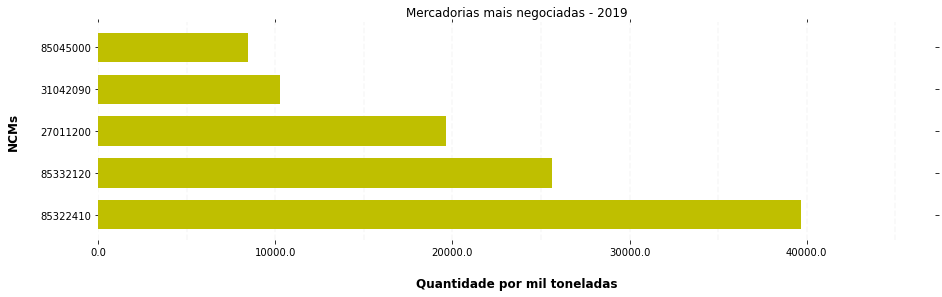

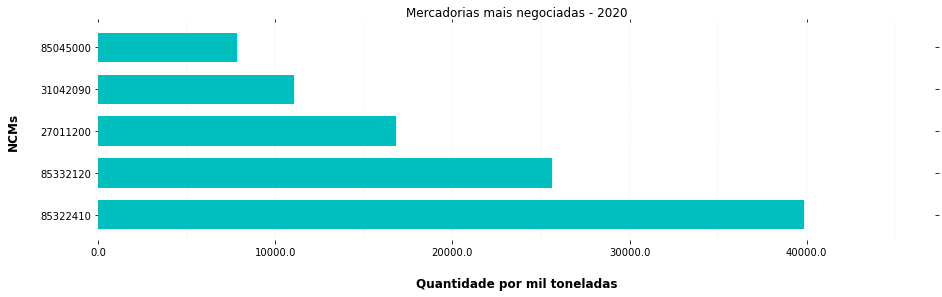

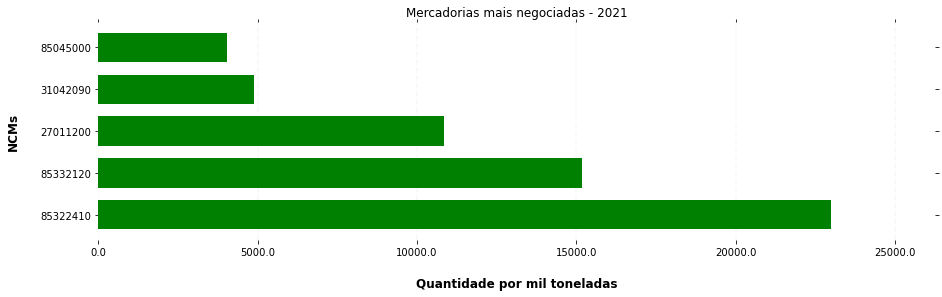

In [128]:
from matplotlib.ticker import StrMethodFormatter

def plota_ncm(df, color):
    ano = df.iloc[1,0] # pega o ano referente ao dataset

    # 2. Descrição das NCMs    
    df = df.groupby('ncm').quantidade.agg(['sum']).nlargest(5,'sum')

    ncms = df.merge(df_ncm, on = 'ncm', how = 'left')
    legend = ["%s" % i for i in ncms.descricao]
 
    ax = df.plot(title = 'Mercadorias mais negociadas - '+ str(ano),
                 kind='barh', figsize=(15, 4), 
                 color = color, zorder=2, width=0.70, legend = False
                 )

    # Despine
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # Switch off ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

#    table(ax, np.round(df.describe(), 2), loc="upper right", colWidths=[0.2, 0.2, 0.2]);    
    
    # Draw vertical axis lines
    vals = ax.get_xticks()
    for tick in vals:
        ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Set x-axis label
    ax.set_xlabel("Quantidade por mil toneladas", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    ax.set_ylabel("NCMs", labelpad=20, weight='bold', size=12)

    # Format y-axis label
    ax.xaxis.set_major_formatter(lambda x, pos: str(x/1000000))

plota_ncm(df19, 'y')
plota_ncm(df20, 'c')
plota_ncm(df21, 'g')
